# Why is university tuition so high in the US?

There have been lots of news stories covering how university tuition is rising in the United States and is outpacing the financial means of students (before and after graduation). With the avaiable data from the US College Scorecard dataset, I will dive into this question and try to ascertain what is largest reason for rising tuition and produce cost-effective recommendations to alleviate the issue without harming the quality of education.

## College Scorecard

It's no secret that US university students often graduate with debt repayment obligations that far outstrip their employment and income prospects. While it's understood that students from elite colleges tend to earn more than graduates from less prestigious universities, the finer relationships between future income and university attendance are quite murky. In an effort to make educational investments less speculative, the US Department of Education has matched information from the student financial aid system with federal tax returns to create the College Scorecard dataset.

For my purposes, I'm going to examine the relationship between school tuition and other features of the dataset, along with changes in tuition over the lifetime of the Scorecard.

In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

## Reading data from file folder

Since there's datasets since the inception of the scorecard (1996) that could to be read in, I created a function that goes into the data folder, reads each csv, and concatenates each one onto a dataframe. 

Because each year of data contains over 2000 columns, it will be best if I select only the past seven years to reduce runtime. The function will then append the csv's one after another. It's possible that I could lose some insights by doing this as there could have been some key catalysts in the educational system in the years I did not cover. It would also be better to transfer these csv's into something like a sqlite database, but for my purposes reading and filtering with pandas should do for now. 

In [2]:
# outputs all csv's into one file and saves it as new csv 
def read_files(in_path, out_path):
    file_list = os.listdir(in_path)
    output = []
    
    for file_name in file_list:
        df = pd.read_csv(os.path.join(in_path, file_name))
        
        # adding a date column as the filename of the csv that the data point originated from
        df['DATE'] = file_name
        output.append(df)
    
    df_combined = pd.concat(output)
    
    # final combined data
    df_combined.to_csv(os.path.join(out_path, 'college_scorecard_fiveyears.csv'), index = False)

In [3]:
# executing function to reorganize last five years of data
read_files('D:/Python/validere_takehome/CollegeScorecard_Raw_Data/data', 
           'D:/Python/validere_takehome/CollegeScorecard_Raw_Data/combined_data')

c:\users\sliu742\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3242: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\users\sliu742\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3242: DtypeWarning: Columns (1,6,1461,1561,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\users\sliu742\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3242: DtypeWarning: Columns (1537,1540,1542,1575,1606,1614,1615,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\users\sliu742\appdata\local\programs\python\python37\lib\site-packages\IPython\core\inte

In [4]:
# reading in files
uni_df = pd.read_csv('D:/Python/validere_takehome/CollegeScorecard_Raw_Data/combined_data/college_scorecard_fiveyears.csv', 
                     warn_bad_lines = False)
uni_df.head()

c:\users\sliu742\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (1,6,7,8,9,31,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP,DATE
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2009_10_PP.csv
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2009_10_PP.csv
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2009_10_PP.csv
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2009_10_PP.csv
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2009_10_PP.csv


In [5]:
# what is the shape of the data?
uni_df.shape

(67418, 1978)

Essentially, each dataset corresponds to a specific school in a specific year. There are many features to the data with many features having mixed types! This will require a good amount of cleaning and reading of the data dictionary to drop unecessary features before conducting further analysis.

Looking at the data dictionary and sheer amount of features this dataset has, it would probably be best to pull useful features instead of dropping ones that aren't useful.

## Data cleaning

After a read-through of the technical documentation, I selected some features that I thought would be interesting to analyze and may be related to rising tuition. Broad categories these features fit under include the location/size of the university, tuition, revenue/expenses, faculty salaries, acceptance rates, SAT averages, average debt/grants, repayment period of debt after graduation, family earnings, and earnings after graduation.  

In [6]:
columns = ['INSTNM', 'CITY', 'STABBR', 'ZIP', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'LOCALE', 'LOCALE2',
                 'LATITUDE', 'LONGITUDE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'ADM_RATE', 'SAT_AVG',
                 'NPT4_PUB' ,'NPT4_PRIV', 'NPT4_PROG', 'NPT4_OTHER', 'NUM4_PUB', 'NUM4_PRIV' ,'NUM4_PROG', 'NUM4_OTHER',
                 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'PFTFAC', 'PCTPELL', 'PCTFLOAN', 
                  'DEP_STAT_PCT_IND', 'DEP_INC_AVG', 'IND_INC_AVG', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'MD_EARN_WNE_P6', 'DATE']

Time to split up the original dataframe into one that will actually be used for further analysis!

In [7]:
# splitting the dataframe
uni_df = uni_df[columns]
uni_df.shape

(67418, 39)

Only 39 columns to worry about, much better than looking at almost 2000.

Let's remap these column names to ones that are a bit more descriptive.

In [8]:
# creating a dictionary to map new feature names
columns_map = {'INSTNM': 'name', 'CITY': 'city', 'STABBR': 'state', 'ZIP': 'zip', 'NUMBRANCH': 'branches', 
               'PREDDEG': 'degrees_awarded_predominant', 'HIGHDEG': 'degrees_awarded_highest', 'LOCALE': 'locale', 
               'LOCALE2': 'degree_urbanization', 'LATITUDE': 'latitude', 'LONGITUDE': 'longitude', 'CCBASIC': 'class_basic', 
               'CCUGPROF': 'class_undergrad', 'CCSIZSET': 'class_size_and_setting', 'ADM_RATE': 'admission_rate', 
               'SAT_AVG': 'sat_avg_overall', 'NPT4_PUB': 'net_price_public','NPT4_PRIV': 'net_price_private', 
               'NPT4_PROG': 'net_price_program_year', 'NPT4_OTHER': 'net_price_other', 'NUM4_PUB': 'num_students_public', 
               'NUM4_PRIV': 'num_students_private' ,'NUM4_PROG': 'num_students_program_year', 'NUM4_OTHER': 'num_students_other',
               'TUITIONFEE_IN': 'instate_tuition', 'TUITIONFEE_OUT': 'outstate_tuition', 'TUITFTE': 'net_revenue_per_student', 
               'INEXPFTE': 'instructional_expenditure_per_student', 'AVGFACSAL': 'avg_faculty_salary', 
               'PFTFAC': 'ft_faculty_rate', 'PCTPELL': 'grant_rate', 'PCTFLOAN': 'federal_loan_rate', 
               'DEP_STAT_PCT_IND': 'financial_independent_student_rate', 'DEP_INC_AVG': 'avg_income_dependent_students', 
               'IND_INC_AVG': 'avg_income_independent_students', 'GRAD_DEBT_MDN': 'median_grad_debt', 
               'WDRAW_DEBT_MDN': 'median_withdraw_debt', 'MD_EARN_WNE_P6': 'median_earnings_6years', 'DATE': 'date'}

uni_df.rename(columns = columns_map, inplace = True)

I want to now look at what percentage of this data is missing, just to get a sense of the completeness of the data. I can get the percentage of non-missing values in each column by taking the result of the count method and dividing by the number of rows.

In [9]:
uni_df.count() / len(uni_df)

name                                     1.000000
city                                     1.000000
state                                    1.000000
zip                                      1.000000
branches                                 1.000000
degrees_awarded_predominant              1.000000
degrees_awarded_highest                  1.000000
locale                                   0.098905
degree_urbanization                      0.000000
latitude                                 0.098905
longitude                                0.098905
class_basic                              0.098905
class_undergrad                          0.098905
class_size_and_setting                   0.098905
admission_rate                           0.302412
sat_avg_overall                          0.183245
net_price_public                         0.248509
net_price_private                        0.530274
net_price_program_year                   0.069017
net_price_other                          0.007016


Plenty of NA values in these columns. This could be due to measurement issues year over year for a majority of schools or deprecated fields that are still in the College Scorecard. Some features, because they are non-exhaustive, may have NA values instead of 0's (instate_tuition and outstate_tuition, for example)

To start, let's delete all features with 100% NA values.

In [10]:
# dropping all columns with 100% NA values
uni_df.dropna(axis = 1, how = 'all', inplace = True)
uni_df.shape

(67418, 38)

In [11]:
# formatting date to only include year of the observation
for i in range(len(uni_df['date'])):
    uni_df['date'][i] = uni_df['date'][i].rsplit('_')[0].rsplit('D')[1]

c:\users\sliu742\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Exploratory analysis

Now that the data is clean(ish) I'm going to perform some exploratory analysis and make some hopefully interesting visualizations. Some general assumptions before diving into the data:

* Schools represented in this dataset is emblematic of all universities in the US
* NA values, for my purposes, will be ignored and therefore not imputed
* Most, if not all analysis will be focused on the undergraduate side, as that is the area which has the most prevalent issue of rising tuition

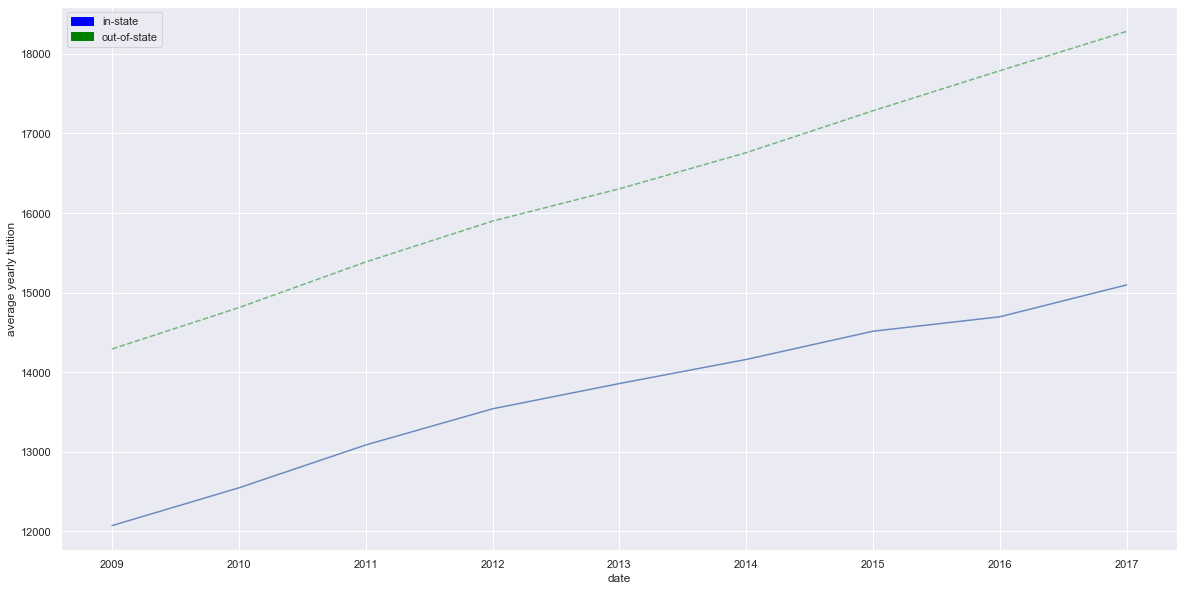

In [12]:
# grouping by date to ascertain average yearly in-state and out-of-state tuition 
uni_instate_tuition = uni_df.groupby('date')['instate_tuition'].mean()
uni_outstate_tuition = uni_df.groupby('date')['outstate_tuition'].mean()

# plotting yearly trend in tuition
sns.set()
plt.figure(figsize = (20,10))
plt.plot(uni_instate_tuition, color = 'b', alpha = 0.8)
plt.plot(uni_outstate_tuition, color = 'g', alpha = 0.8, linestyle = '--')
plt.xlabel('date')
plt.ylabel('average yearly tuition')
legend_a = mpatches.Patch(color = 'blue', label = 'in-state')
legend_b = mpatches.Patch(color = 'green', label = 'out-of-state')
plt.legend(handles = [legend_a, legend_b])

plt.show();

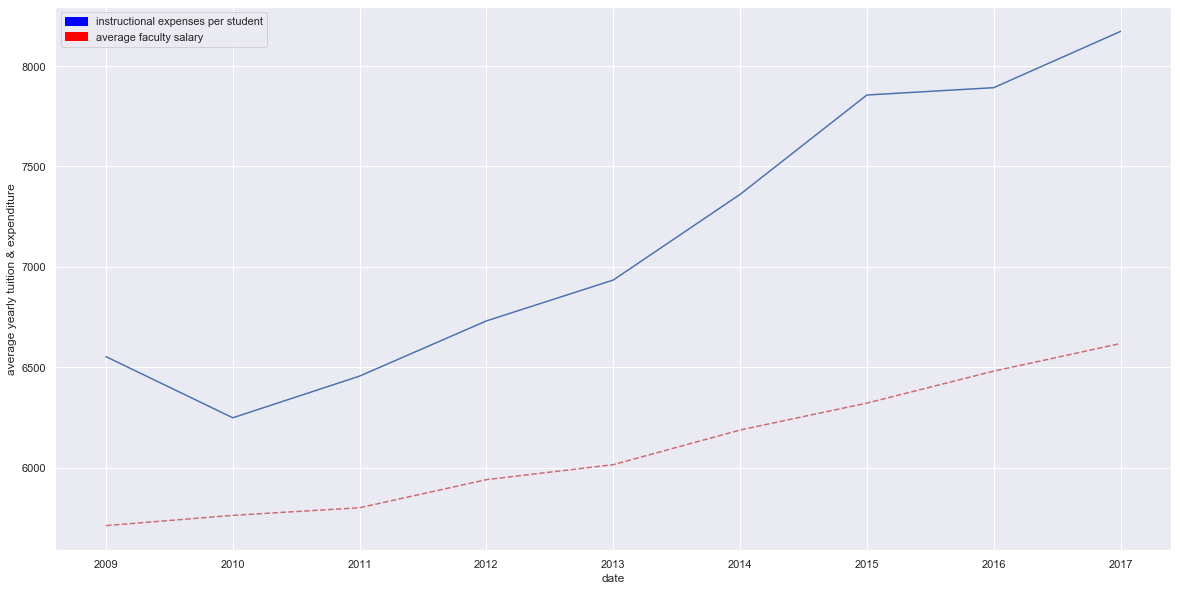

In [13]:
# taking a look at rising instructional expenditure vs. the cost of faculty
uni_expenditure_per_student = uni_df.groupby('date')['instructional_expenditure_per_student'].mean()
uni_faculty_salary = uni_df.groupby('date')['avg_faculty_salary'].mean()

# plotting
plt.figure(figsize = (20,10))
plt.plot(uni_expenditure_per_student, color = 'b', alpha = 1)
plt.plot(uni_faculty_salary, color = 'r', alpha = 0.8, linestyle = '--')
plt.xlabel('date')
plt.ylabel('average yearly tuition & expenditure')
legend_a = mpatches.Patch(color = 'blue', label = 'instructional expenses per student')
legend_b = mpatches.Patch(color = 'red', label = 'average faculty salary')
plt.legend(handles = [legend_a, legend_b])

plt.show();

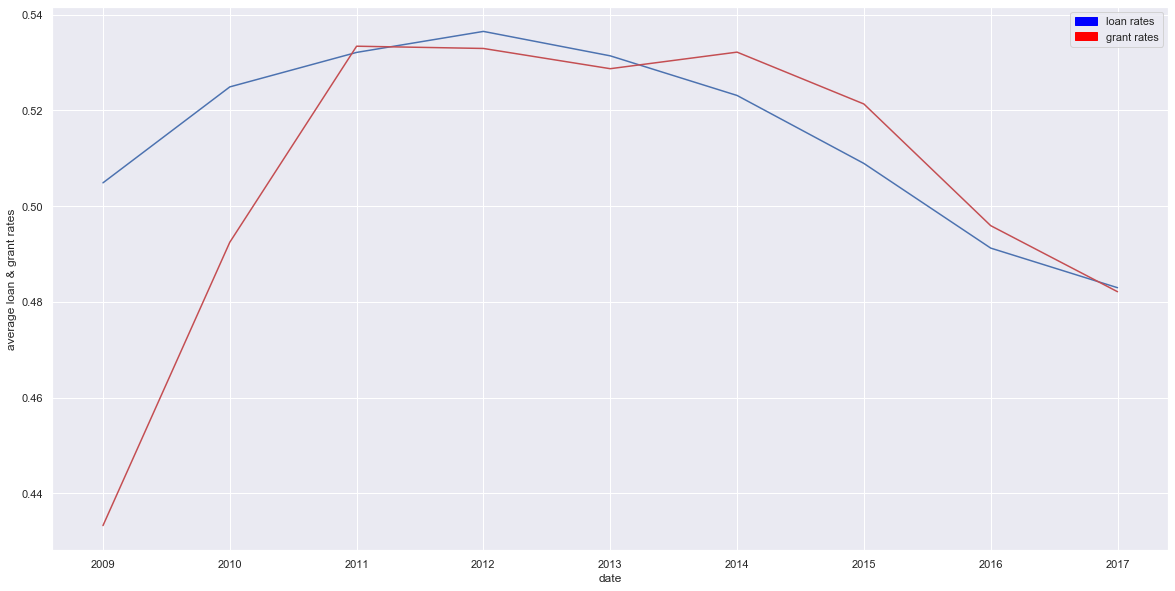

In [14]:
# what's been the trend of federal loan and pell grant rates?
uni_loan_rates = uni_df.groupby('date')['federal_loan_rate'].mean()
uni_grant_rates = uni_df.groupby('date')['grant_rate'].mean()

# plotting
plt.figure(figsize = (20,10))
plt.plot(uni_loan_rates, color = 'b', alpha = 1)
plt.plot(uni_grant_rates, color = 'r', alpha = 1)
plt.xlabel('date')
plt.ylabel('average loan & grant rates')
legend_a = mpatches.Patch(color = 'blue', label = 'loan rates')
legend_b = mpatches.Patch(color = 'red', label = 'grant rates')
plt.legend(handles = [legend_a, legend_b])

plt.show();

In [15]:
# transforming privacy supression values into nan and converting to float
uni_df['median_grad_debt'] = pd.to_numeric(uni_df['median_grad_debt'], errors = 'coerce', downcast = 'float')
uni_df['median_earnings_6years'] = pd.to_numeric(uni_df['median_earnings_6years'], errors = 'coerce', downcast = 'float')

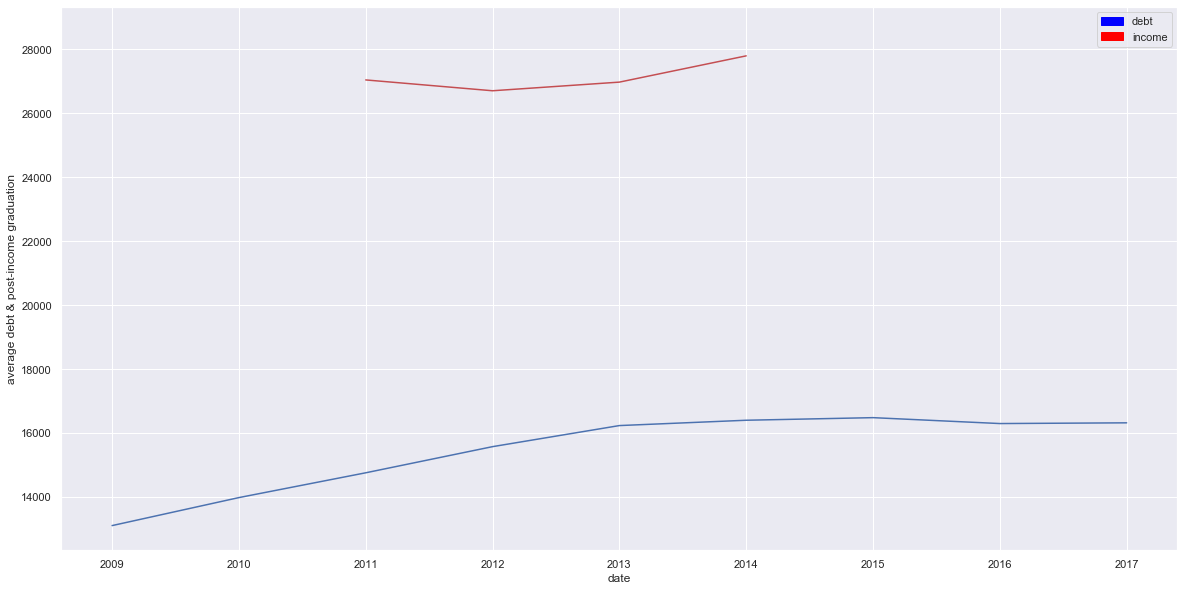

In [16]:
# median debt after graduation and average income
uni_debt = uni_df.groupby('date')['median_grad_debt'].mean()
uni_post_income = uni_df.groupby('date')['median_earnings_6years'].mean()

# plotting
plt.figure(figsize = (20,10))
plt.plot(uni_debt, color = 'b', alpha = 1)
plt.plot(uni_post_income, color = 'r', alpha = 1)
plt.xlabel('date')
plt.ylabel('average debt & post-income graduation')
legend_a = mpatches.Patch(color = 'blue', label = 'debt')
legend_b = mpatches.Patch(color = 'red', label = 'income')
plt.legend(handles = [legend_a, legend_b])

plt.show();

TO DO:
* Set metrics/calculated fields to generate insights
* More creative visualizations
* Build some sort of model
* Make recommendation
* Edit communication - assumptions and constraints